In [26]:
import requests
import pandas as pd

# List of latitudes, longitudes, and corresponding province names
coordinates = [
    ("Badakhshan", 37.2531, 69.3070),
    ("Badghis", 35.1397, 62.1855),
    ("Balkh", 36.7031, 66.9326),
    ("Bamyan", 34.8200, 67.8095),
    ("Daykundi", 34.5809, 66.0936),
    ("Farah", 32.4326, 62.1071),
    ("Faryab", 36.0520, 64.7501),
    ("Ghazni", 33.5501, 68.2350),
    ("Ghor", 33.5659, 64.4635),
    ("Helmand", 31.5790, 65.7220),
    ("Herat", 34.3485, 62.2039),
    ("Jowzjan", 36.7384, 65.7164),
    ("Kabul", 34.5294, 69.1658),
    ("Kandahar", 31.6104, 65.7101),
    ("Kunar", 34.6130, 71.0553),
    ("Kunduz", 36.7272, 68.8617),
    ("Laghman", 34.5176, 70.3052),
    ("Logar", 33.9750, 69.1181),
    ("Nangarhar", 34.4408, 70.4500),
    ("Nimroz", 30.9522, 61.8617),
    ("Nuristan", 35.2550, 71.5429),
    ("Paktia", 33.5619, 69.2137),
    ("Paktika", 32.5325, 69.4181),
    ("Panjshir", 35.0849, 69.1202),
    ("Samangan", 36.7175, 68.0946),
    ("Sar-e Pol", 36.2167, 66.0111),
    ("Takhar", 36.7013, 69.1186),
    ("Urozgan", 32.0156, 65.5817),
    ("Wardak", 34.4155, 68.4546),
    ("Zabul", 32.1450, 66.9027)
]

# NASA API endpoint for solar data (Power API)
url = "https://power.larc.nasa.gov/api/temporal/daily/point"

# Your NASA API key (replace with your key)
api_key = "yqRThA9klhvAI9TrV4VbeOHsmaGdQFZQ55dfNXAr"

# Date range for solar data
start_date = '20240101'
end_date = '20240101'

# Parameters for the solar radiation data (added 5 parameters)
params = {
    'start': start_date,
    'end': end_date,
    'parameters': 'PW,CLRSKY_SFC_SW_DWN,T2M,ALLSKY_SFC_SW_DWN,CLOUD_AMT_DAY',  # List of 5 parameters
    'format': 'JSON',
    'community': 'RE',  # Renewable Energy community
    'api_key': api_key
}

# Function to get solar data for a specific coordinate
def get_solar_data(lat, lon):
    params['latitude'] = lat
    params['longitude'] = lon
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        # Extract data for each parameter
        solar_data = {
            'PW': data['properties']['parameter']['PW'],
            'CLRSKY_SFC_SW_DWN': data['properties']['parameter']['CLRSKY_SFC_SW_DWN'],
            'T2M': data['properties']['parameter']['T2M'],
            'ALLSKY_SFC_SW_DWN': data['properties']['parameter']['ALLSKY_SFC_SW_DWN'],
            'CLOUD_AMT_DAY': data['properties']['parameter']['CLOUD_AMT_DAY']
        }
        return solar_data
    else:
        print(f"Error fetching data for ({lat}, {lon}): {response.status_code}")
        return None

# Create an empty list to store data for DataFrame
data_for_df = []

# Fetch solar data for each coordinate
for province, lat, lon in coordinates:
    solar_info = get_solar_data(lat, lon)
    if solar_info is not None:
        solar_info['Province'] = province  # Add province name to the data
        solar_info['Latitude'] = lat
        solar_info['Longitude'] = lon
        data_for_df.append(solar_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data_for_df)

# Display the DataFrame
df


,PW,CLRSKY_SFC_SW_DWN,T2M,ALLSKY_SFC_SW_DWN,CLOUD_AMT_DAY,Province,Latitude,Longitude
0,{'20240101': 0.44},{'20240101': 3.16},{'20240101': 9.23},{'20240101': 3.16},{'20240101': 5.84},Badakhshan,37.2531,69.3070
1,{'20240101': 0.65},{'20240101': 3.21},{'20240101': 7.77},{'20240101': 2.87},{'20240101': 25.05},Badghis,35.1397,62.1855
2,{'20240101': 0.62},{'20240101': 3.1},{'20240101': 9.59},{'20240101': 3.06},{'20240101': 13.91},Balkh,36.7031,66.9326
3,{'20240101': 0.18},{'20240101': 3.82},{'20240101': -3.0},{'20240101': 3.75},{'20240101': 19.44},Bamyan,34.8200,67.8095
4,{'20240101': 0.18},{'20240101': 3.78},{'20240101': -2.23},{'20240101': 3.66},{'20240101': 26.55},Daykundi,34.5809,66.0936
5,{'20240101': 1.09},{'20240101': 3.59},{'20240101': 10.64},{'20240101': 3.47},{'20240101': 20.55},Farah,32.4326,62.1071
6,{'20240101': 0.59},{'20240101': 3.0},{'20240101': 8.37},{'20240101': 2.92},{'20240101': 27.36},Faryab,36.0520,64.7501
7,{'20240101': 0.22},{'20240101': 3.66},{'20240101': 0.73},{'20240101': 3.59},{'20240101': 21.41},Ghazni,33.5501,68.2350
8,{'20240101': 0.26},{'20240101': 3.85},{'20240101': 1.24},{'20240101': 3.64},{'20240101': 21.57},Ghor,33.5659,64.4635
9,{'20240101': 0.73},{'20240101': 3.96},{'20240101': 8.7},{'20240101': 4.0},{'20240101': 3.92},Helmand,31.5790,65.7220


<ipython-input-27-1ba90c5f43c5>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_score', y='Province', data=df_sorted, palette='viridis')


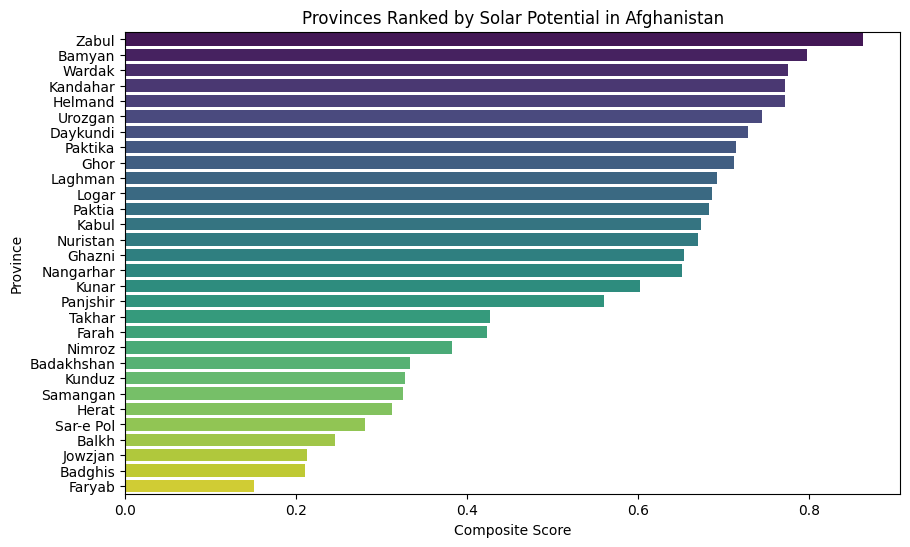

,Province,composite_score
29,Zabul,0.863660
3,Bamyan,0.797604
28,Wardak,0.775353
13,Kandahar,0.772489
9,Helmand,0.772489
27,Urozgan,0.744845
4,Daykundi,0.728741
22,Paktika,0.714757
8,Ghor,0.712408
16,Laghman,0.692292


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant parameter values (assuming you want data for a specific date)
date_of_interest = '20240101'  # Change to your target date

# Extract the values for each parameter
df['PW'] = df['PW'].apply(lambda x: x.get(date_of_interest, np.nan) if isinstance(x, dict) else np.nan)
df['CLRSKY_SFC_SW_DWN'] = df['CLRSKY_SFC_SW_DWN'].apply(lambda x: x.get(date_of_interest, np.nan) if isinstance(x, dict) else np.nan)
df['T2M'] = df['T2M'].apply(lambda x: x.get(date_of_interest, np.nan) if isinstance(x, dict) else np.nan)
df['ALLSKY_SFC_SW_DWN'] = df['ALLSKY_SFC_SW_DWN'].apply(lambda x: x.get(date_of_interest, np.nan) if isinstance(x, dict) else np.nan)
df['CLOUD_AMT_DAY'] = df['CLOUD_AMT_DAY'].apply(lambda x: x.get(date_of_interest, np.nan) if isinstance(x, dict) else np.nan)

# Normalize each parameter (scale to 0-1)
df['PW'] = (df['PW'] - df['PW'].min()) / (df['PW'].max() - df['PW'].min())
df['CLRSKY_SFC_SW_DWN'] = (df['CLRSKY_SFC_SW_DWN'] - df['CLRSKY_SFC_SW_DWN'].min()) / (df['CLRSKY_SFC_SW_DWN'].max() - df['CLRSKY_SFC_SW_DWN'].min())
df['T2M'] = (df['T2M'] - df['T2M'].min()) / (df['T2M'].max() - df['T2M'].min())
df['ALLSKY_SFC_SW_DWN'] = (df['ALLSKY_SFC_SW_DWN'] - df['ALLSKY_SFC_SW_DWN'].min()) / (df['ALLSKY_SFC_SW_DWN'].max() - df['ALLSKY_SFC_SW_DWN'].min())
df['CLOUD_AMT_DAY'] = (df['CLOUD_AMT_DAY'] - df['CLOUD_AMT_DAY'].min()) / (df['CLOUD_AMT_DAY'].max() - df['CLOUD_AMT_DAY'].min())

# Calculate the composite score
df['composite_score'] = (
    0.3 * df['ALLSKY_SFC_SW_DWN'] +  # High weight to solar radiation
    0.3 * df['CLRSKY_SFC_SW_DWN'] +  # Clear sky solar radiation
    0.1 * (1 - df['CLOUD_AMT_DAY']) +  # Lower cloud cover is better
    0.1 * (1 - df['PW']) +  # Precipitable water, lower is better
    0.2 * (1 - df['T2M'])   # Temperature, lower is better
)

# Sort the provinces by composite score (higher is better)
df_sorted = df.sort_values(by='composite_score', ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='composite_score', y='Province', data=df_sorted, palette='viridis')
plt.title('Provinces Ranked by Solar Potential in Afghanistan')
plt.xlabel('Composite Score')
plt.ylabel('Province')
plt.show()

# Display the sorted DataFrame
df_sorted[['Province', 'composite_score']]


In [34]:
df2 = df_sorted

In [36]:
# Save the DataFrame to an Excel file
df2.to_excel('solar_potential_afghanistan.xlsx', index=False)


In [37]:
!pip install openpyxl

# Save the DataFrame to an Excel file
df2.to_excel('solar_potential_afghanistan.xlsx', index=False)


from google.colab import files
files.download('solar_potential_afghanistan.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>